<a href="https://colab.research.google.com/github/JamesHTTS/-AI/blob/main/class2_drownsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vmbdxLRoIqdWTAsyPMP8")
project = rf.workspace("drowsiness-detection-uhhz5").project("drownsy-dectetion-v2")
version = project.version(3)
dataset = version.download("yolov8")
# Dataset(사진들+label) 웹사이트로부터 가져오는 명령어들

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drownsy-Dectetion-v2-3 in yolov8:: 100%|██████████| 13200/13200 [00:01<00:00, 8321.88it/s] 


In [ ]:
!cat /content/Drownsy-Dectetion-v2-3/data.yaml
# 어떻게 분류되어 있는지 확인하는 명령어

names:
- Buon_Ngu
- Tinh_Tao
nc: 2
roboflow:
  license: CC BY 4.0
  project: drownsy-dectetion-v2
  url: https://universe.roboflow.com/testing-uvyji/drownsy-dectetion-v2/dataset/3
  version: 3
  workspace: testing-uvyji
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
!pip install PyYAML
!pwd
# yaml활용하도록 프로그램 설치 및 현재 디렉토리 확인

/content


In [ ]:
import yaml

data = { 'train' : '/content/Drownsy-Dectetion-v2-3/train/images',
         'val' : '/content/Drownsy-Dectetion-v2-3/valid/images',
         'test' : '/content/Drownsy-Dectetion-v2-3/test/images',
         'names' : ['drownsy','awake'],
         'nc' : 2 }

with open('/content/Drownsy-Dectetion-v2-3/Drowsiness_data.yaml', 'w') as f:
  yaml.dump(data, f)

with open('/content/Drownsy-Dectetion-v2-3/Drowsiness_data.yaml', 'r') as f:
  drowsiness_yaml = yaml.safe_load(f)
  display(drowsiness_yaml)

# label 분류 이름을 drwonsy,awake로 바꾸고, train,valid,test 데이터들 위치 수정,valid는 학습이 완료된 모델을 검증하는 dataset, test는 학습과 검증이 완료된 모델을 최종평가하는 데 쓰임.

{'names': ['drownsy', 'awake'],
 'nc': 2,
 'test': '/content/Drownsy-Dectetion-v2-3/test/images',
 'train': '/content/Drownsy-Dectetion-v2-3/train/images',
 'val': '/content/Drownsy-Dectetion-v2-3/valid/images'}

In [ ]:
!pip install ultralytics

import ultralytics

ultralytics.checks()
# yolo 모델을 오픈소스로 사용하는 ultralytics 임포트

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

print(type(model.names), len(model.names))

print(model.names)

# yoloy8v모델 사용, 기존 class 분류 확인

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [ ]:
model.train(data = '/content/Drownsy-Dectetion-v2-3/Drowsiness_data.yaml', epochs=15, patience=20, batch=16, imgsz=320)
# model학습시키기, epchs는odel.train(data = '/content/Drownsy-Dectetion-v2-3/Drowsiness_data.yaml', epochs=15, patience=20, batch=16, imgsz=320)
# model학습시키기, epchs는 전체데이터를 몇번 반복해서 학습시킬 것인지,patience는 성능이 몇 epoch이내에 개선되지 않으면 종료함 ,batch는 전체 데이터를 몇개씩 묶어서 학습시킬지 ,imgsz는 이미지 크기(해상도)를 의미

NameError: name 'model' is not defined

In [ ]:
print(type(model.names), len(model.names))

print(model.names)
# 클래스 개수 및 model이 어떤 label로 분류했는지 확인

<class 'dict'> 2
{0: 'drownsy', 1: 'awake'}


In [ ]:
results = model.predict(source = '/content/Drownsy-Dectetion-v2-3/test/images', save=True)
# test image를 활용하여 모델이 예측한 값들을 results에 저장


image 1/384 /content/Drownsy-Dectetion-v2-3/test/images/1007_jpg.rf.979b5cc978555d8d7cd374bdc197e245.jpg: 320x320 1 awake, 8.1ms
image 2/384 /content/Drownsy-Dectetion-v2-3/test/images/1032_jpg.rf.02a5b95c1093150b3dca247aab1db800.jpg: 320x320 1 awake, 7.0ms
image 3/384 /content/Drownsy-Dectetion-v2-3/test/images/1114_jpg.rf.e98ceb91c50af91082b1397426e2bc2f.jpg: 320x320 1 awake, 6.5ms
image 4/384 /content/Drownsy-Dectetion-v2-3/test/images/1130_jpg.rf.44dbe465cc24048a3a9d51fbbce765e7.jpg: 320x320 1 awake, 7.4ms
image 5/384 /content/Drownsy-Dectetion-v2-3/test/images/1178_jpg.rf.32b674af39e6211388bf49b3a5b837c1.jpg: 320x320 1 awake, 8.0ms
image 6/384 /content/Drownsy-Dectetion-v2-3/test/images/117_jpg.rf.85903ee6b29be821313ad45ff6664617.jpg: 320x320 1 drownsy, 5.8ms
image 7/384 /content/Drownsy-Dectetion-v2-3/test/images/119_jpg.rf.89790efcf6beb2d4c4ce4f70244ecb99.jpg: 320x320 1 drownsy, 5.7ms
image 8/384 /content/Drownsy-Dectetion-v2-3/test/images/1247_jpg.rf.e2753c643b1a3044ae7f19543d

In [ ]:
print(results[0])

print()

print(results[0].boxes)
# result 0번째에 대한 정보들을 print함. box명령어는 바운딩 박스를 의미

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'drownsy', 1: 'awake'}
obb: None
orig_img: array([[[133, 124, 120],
        [133, 124, 120],
        [133, 124, 120],
        ...,
        [101, 112, 104],
        [ 97, 108, 100],
        [ 95, 106,  98]],

       [[134, 125, 121],
        [134, 125, 121],
        [134, 125, 121],
        ...,
        [107, 118, 110],
        [103, 114, 106],
        [101, 112, 104]],

       [[135, 126, 122],
        [135, 126, 122],
        [135, 126, 122],
        ...,
        [114, 125, 117],
        [112, 123, 115],
        [111, 122, 114]],

       ...,

       [[ 60,  86,  68],
        [128, 154, 136],
        [109, 137, 117],
        ...,
        [ 29,  32,  23],
        [ 36,  39,  30],
        [ 41,  44,  35]],

       [[ 47,  73,  55],
        [120, 146, 128],
        [108, 136, 116],
        ...,
        [ 22,  25,  16],
        [ 24,  27,  18],


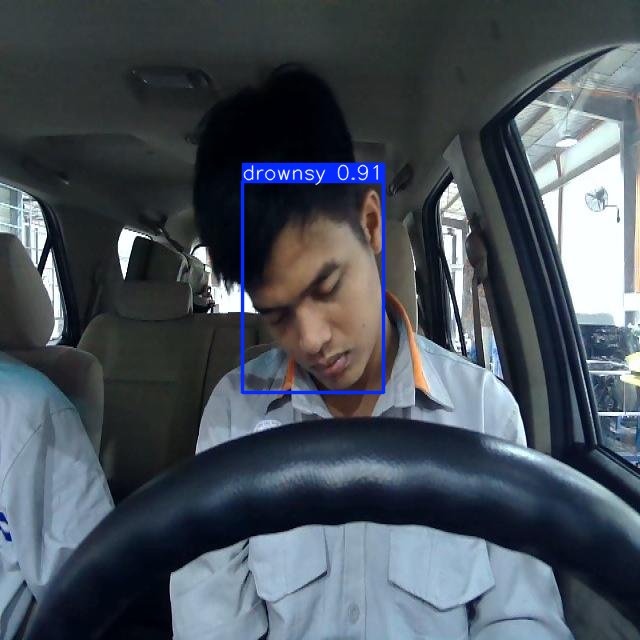

In [ ]:
from google.colab.patches import cv2_imshow
res_plotted = results[61].plot()
cv2_imshow(res_plotted)
# 제대로 인식되었는지 predict저장된 data로 확인

In [ ]:
!python export.py --weights /content/runs/detect/train/weights/best.pt --include tflite --img 320

python3: can't open file '/content/export.py': [Errno 2] No such file or directory


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')
model.export(format='tflite', imgsz=320)
# 가중치 데이터 tflite 형식으로 추출함.(기존에는 best.pt(pytorch)파일)

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 6, 2100) (5.9 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx>=1.12.0,<=1.19.1', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 20 packages in 1.90s
Prepared 11 packages in 5.22s
Installed 11 packages in 357ms
 + ai-edge-litert==2.0.3
 + backports-strenum==1.3.1
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnx-graphsurgeon==0.5.8
 + onnx2tf==1.2

'/content/runs/detect/train/weights/best_saved_model/best_float32.tflite'